In [1]:
from keras.models import Sequential
from keras import optimizers
from keras import models
from keras import layers

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pywt

In [3]:
file1 = 'generated_data_25000.csv'
targets = 'generated_targets_25000.csv'

In [4]:
y = pd.read_csv(targets, header=None)
y = y.iloc[:,1:]
y = y.append(pd.read_csv('generated_targets_10000.csv', header=None).iloc[:,1:])
x = pd.read_csv(file1, header=None)
x = x.append(pd.read_csv('generated_data_10000.csv', header=None))
print(y.shape)
print(x.shape)

(35000, 3)
(35000, 400)


In [8]:
scales = np.arange(1, 101)
waveletname = 'morl'

def cwt(size, data):
    data_cwt = np.ndarray(shape=(size, 100, 100, 4), dtype=np.float16)
    for i in range(0, size):
        if (i % 1000 == 0):
            print(i, ' training examples finished')
        for j in range(0,4):
            signal = data[i, j*100: 100+j*100]
            coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
            coeff_ = coeff[:,:100]
            data_cwt[i, :, :, j] = coeff_
    return data_cwt

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn import preprocessing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

# scaler = preprocessing.RobustScaler().fit(x_train)
scaler = joblib.load('35000scaler81919.save') 
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# joblib.dump(scaler, '35000scaler81919.save')

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

x_val = cwt(x_val.shape[0], x_val)
print('x_val finished')
partial_x_train = cwt(partial_x_train.shape[0], partial_x_train)
print('x_train finished')
x_test = cwt(x_test.shape[0], x_test)

0  training examples finished
x_val finished
0  training examples finished
1000  training examples finished
2000  training examples finished
3000  training examples finished
4000  training examples finished
5000  training examples finished
6000  training examples finished
7000  training examples finished
8000  training examples finished
9000  training examples finished
10000  training examples finished
11000  training examples finished
12000  training examples finished
13000  training examples finished
14000  training examples finished
15000  training examples finished
16000  training examples finished
17000  training examples finished
18000  training examples finished
19000  training examples finished
20000  training examples finished
21000  training examples finished
22000  training examples finished
23000  training examples finished
24000  training examples finished
25000  training examples finished
26000  training examples finished
27000  training examples finished
28000  training 

In [5]:
import pickle
with open('../../../../../Desktop/xtrain.pickle', 'rb') as p:
    partial_x_train = pickle.load(p)
with open('../../../../../Desktop/xtest.pickle', 'rb') as p:
    x_test = pickle.load(p)
with open('../../../../../Desktop/xval.pickle', 'rb') as p:
    x_val = pickle.load(p)
with open('../../../../../Desktop/ytrain.pickle', 'rb') as p:
    partial_y_train = pickle.load(p)
with open('../../../../../Desktop/ytest.pickle', 'rb') as p:
    y_test = pickle.load(p)
with open('../../../../../Desktop/yval.pickle', 'rb') as p:
    y_val = pickle.load(p)

In [6]:
print(partial_x_train.shape)
print(x_test.shape)
print(x_val.shape)

(30500, 100, 100, 4)
(3500, 100, 100, 4)
(1000, 100, 100, 4)


In [7]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(100, 100, 4)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dense(3))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 98, 98, 16)        592       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 16928)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 2048)              34670592  
_________________________________________________________________
dense_14 (Dense)             (None, 2048)              4196352   
__________

In [12]:
# adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(partial_x_train,
    partial_y_train,
    epochs=45,
    batch_size=512,
    validation_data=(x_val, y_val))

Train on 30500 samples, validate on 1000 samples
Epoch 1/45
30500/30500 [==============================] - 29s 942us/step - loss: 19.7037 - mean_absolute_error: 2.6883 - val_loss: 6.4818 - val_mean_absolute_error: 1.4441
Epoch 2/45
30500/30500 [==============================] - 24s 786us/step - loss: 6.4586 - mean_absolute_error: 1.5096 - val_loss: 8.9396 - val_mean_absolute_error: 1.6949
Epoch 3/45
30500/30500 [==============================] - 24s 786us/step - loss: 8.9676 - mean_absolute_error: 1.8128 - val_loss: 13.9733 - val_mean_absolute_error: 2.2732
Epoch 4/45
30500/30500 [==============================] - 24s 788us/step - loss: 10.6116 - mean_absolute_error: 2.0314 - val_loss: 10.7409 - val_mean_absolute_error: 1.9603
Epoch 5/45
30500/30500 [==============================] - 24s 789us/step - loss: 8.0788 - mean_absolute_error: 1.7360 - val_loss: 8.0915 - val_mean_absolute_error: 1.6627
Epoch 6/45
30500/30500 [==============================] - 24s 786us/step - loss: 7.8520 - me

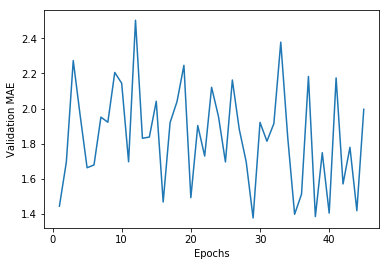

In [13]:
import matplotlib.pyplot as plt
average_mae_history = history.history['val_mean_absolute_error']
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
# from sklearn.svm import SVR
# from joblib import Parallel, delayed

# def train_model(X, y):
#     model = SVR(kernel='rbf', C=1e3, gamma=0.1)
#     return model.fit(X, y)

# training_data = np.array_split(x_train, 4)
# training_targets = np.array_split(y_train, 4)
    
# result = Parallel(n_jobs=2)(delayed(train_model)(training_data[i], training_targets[i]) for i in range(4))
# for i in range(len(models)):
#     models[i].fit(training_data[i], training_targets[i])

In [16]:
model.load_weights('35000_154_81919.h5')

In [17]:
y_pred = model.predict(x_val)

In [18]:
from sklearn import metrics
y_real = y_val

print('Mean absolute error: {}'.format(metrics.mean_absolute_error(y_real, y_pred)))
print('Mean squared error: {}'.format(metrics.mean_squared_error(y_real, y_pred)))
print('Explained varience score: {}'.format(metrics.explained_variance_score(y_real, y_pred)))
print('r^2 score: {}'.format(metrics.r2_score(y_real, y_pred)))

Mean absolute error: 1.5558099390150957
Mean squared error: 6.920084873201932
Explained varience score: 0.9963403293967552
r^2 score: 0.9962905323280739


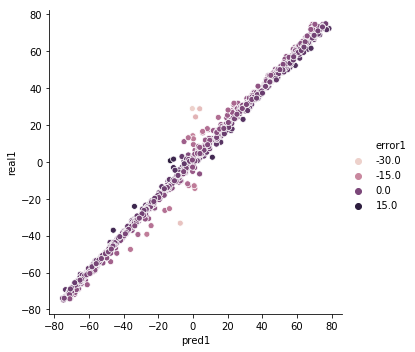

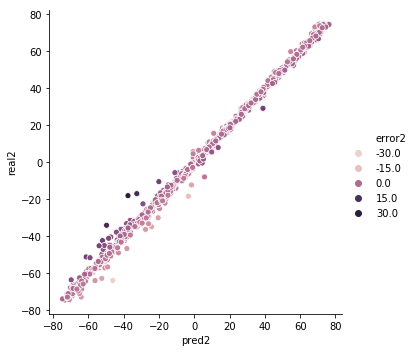

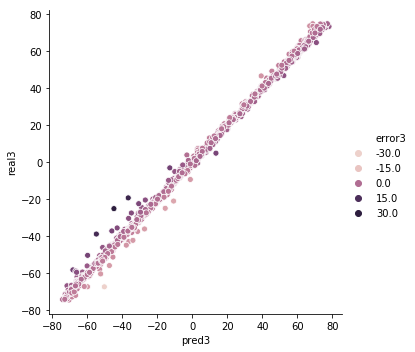

In [19]:
data = pd.DataFrame()

data['pred1'] = np.array(y_pred[:,0])
data['real1'] = pd.DataFrame(y_real).reset_index(drop=True)[1]
data['error1'] = abs(data['pred1'])- abs(data['real1'])

data['pred2'] = np.array(y_pred[:,1])
data['real2'] = pd.DataFrame(y_real).reset_index(drop=True)[2]
data['error2'] = abs(data['pred2'])- abs(data['real2'])

data['pred3'] = np.array(y_pred[:,2])
data['real3'] = pd.DataFrame(y_real).reset_index(drop=True)[3]
data['error3'] = abs(data['pred3'])- abs(data['real3'])

plot1 = sns.relplot(x='pred1', y='real1', hue='error1', data=data)
plot2 = sns.relplot(x='pred2', y='real2', hue='error2', data=data)
plot3 = sns.relplot(x='pred3', y='real3', hue='error3', data=data)

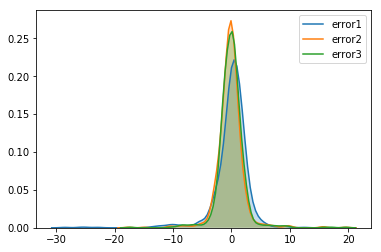

In [47]:
sns.kdeplot(data['error1'], shade=True)
sns.kdeplot(data['error2'], shade=True)
sns.kdeplot(data['error3'], shade=True)

In [1]:
from sklearn.externals import joblib

example_y = pd.read_csv('generated_targets_1.csv', header=None)
example_y = example_y.iloc[:,1:]
example_x = pd.read_csv('generated_data_1.csv', header=None)

scaler = joblib.load('35000scaler81919.save') 
example_x = scaler.transform(example_x)

example_x = cwt(example_x.shape[0], example_x)
predictions = model.predict(example_x)
print(example_y)
print(predictions.squeeze())

NameError: name 'pd' is not defined

In [ ]:
0  55.098971 -50.312804  21.126913
[ 56.336933 -48.822277  21.571787]